In [1]:
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
cln = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',
       'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315 of_diluted_wines', 
       'proline', 'Class']

df = pd.read_csv('wine.csv', names=cln, engine='pyarrow')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")

# missing values
missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")  

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (178, 14)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315 of_diluted_wines', 'proline', 'Class']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-n

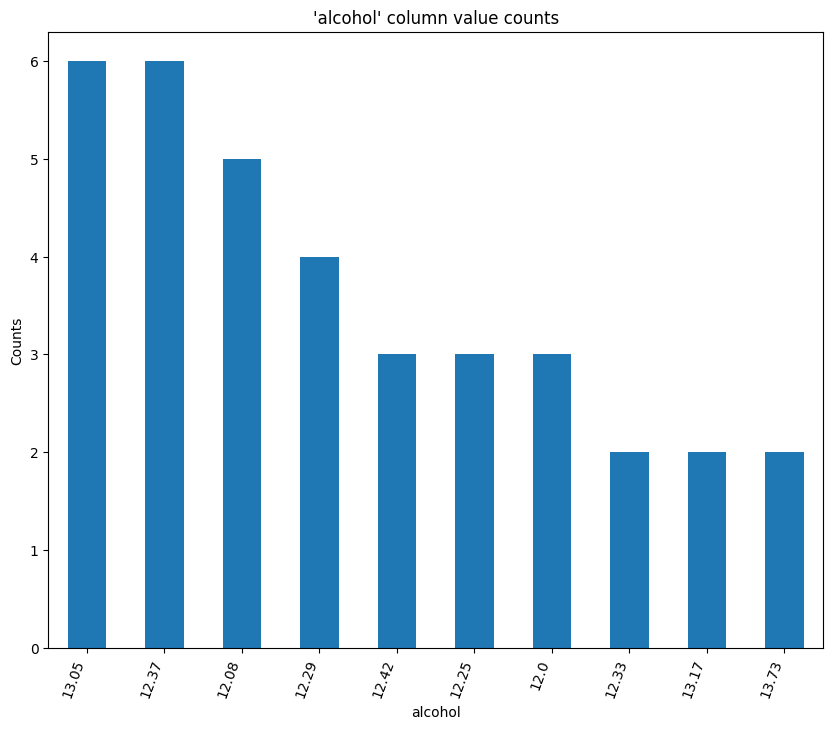

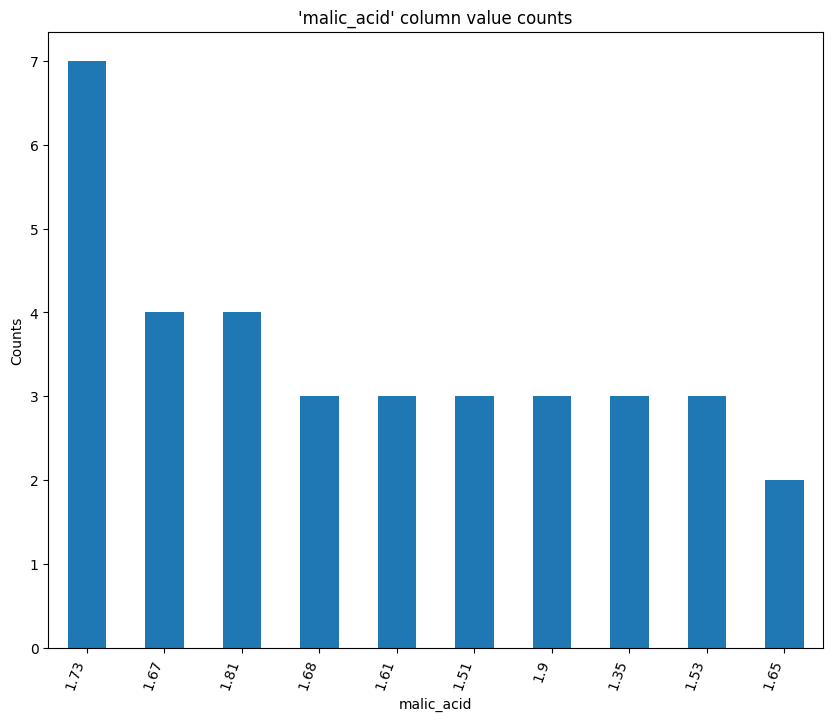

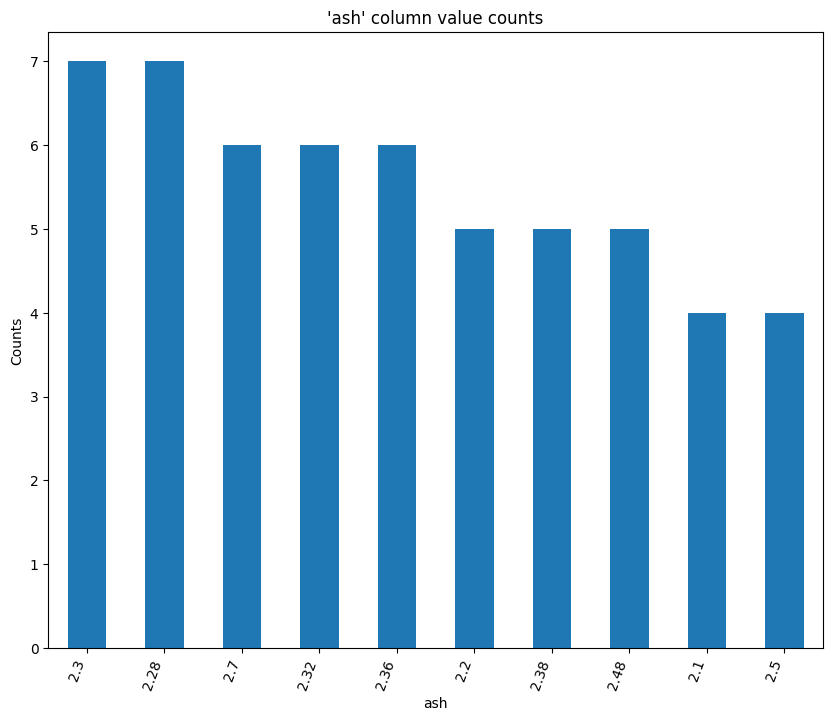

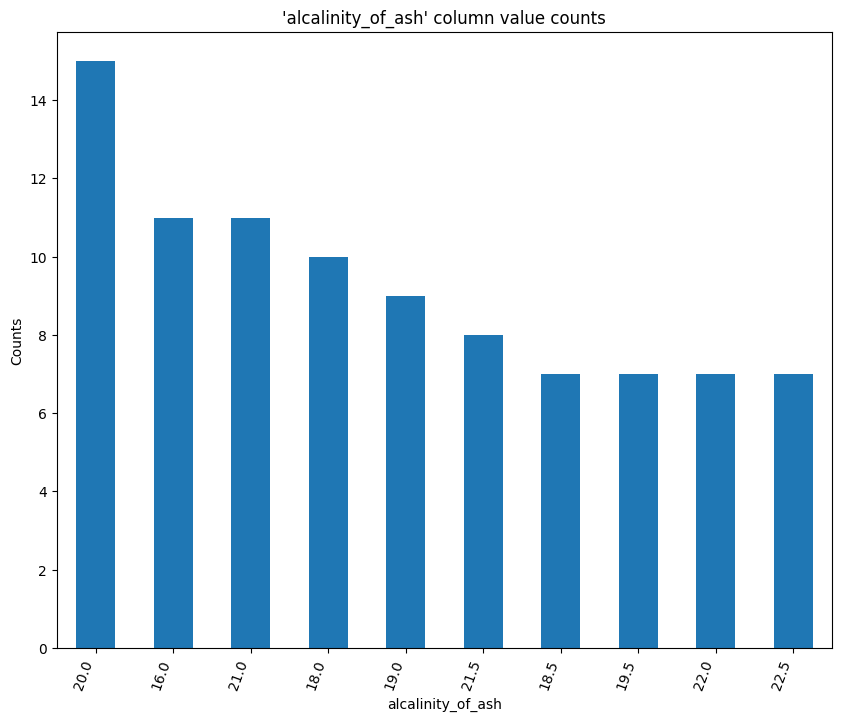

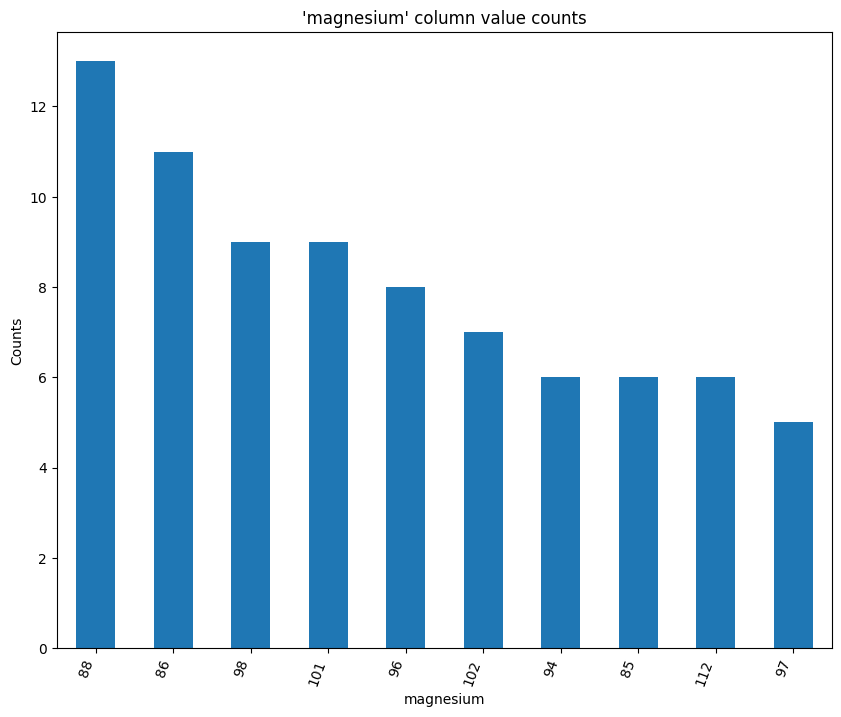

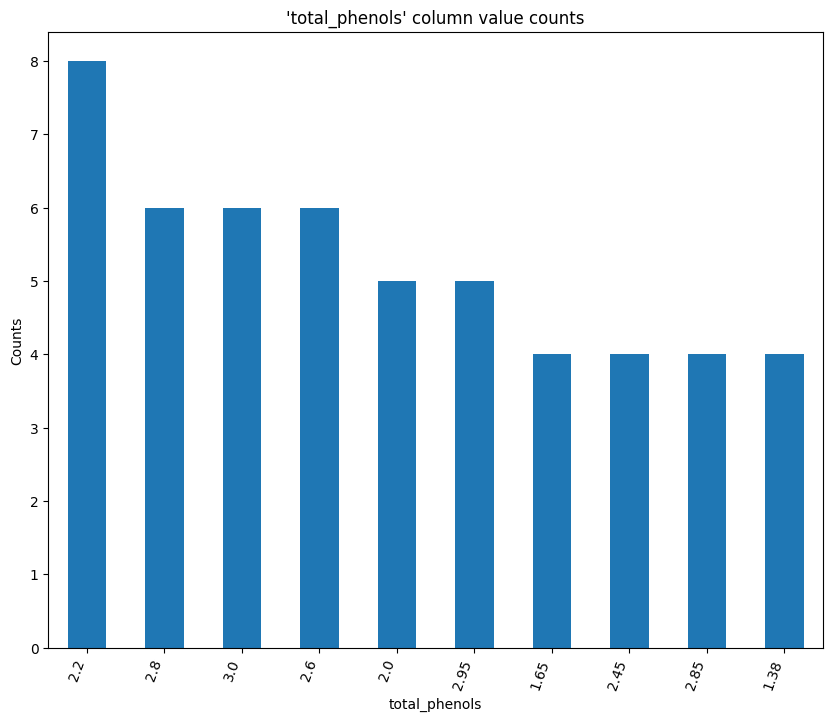

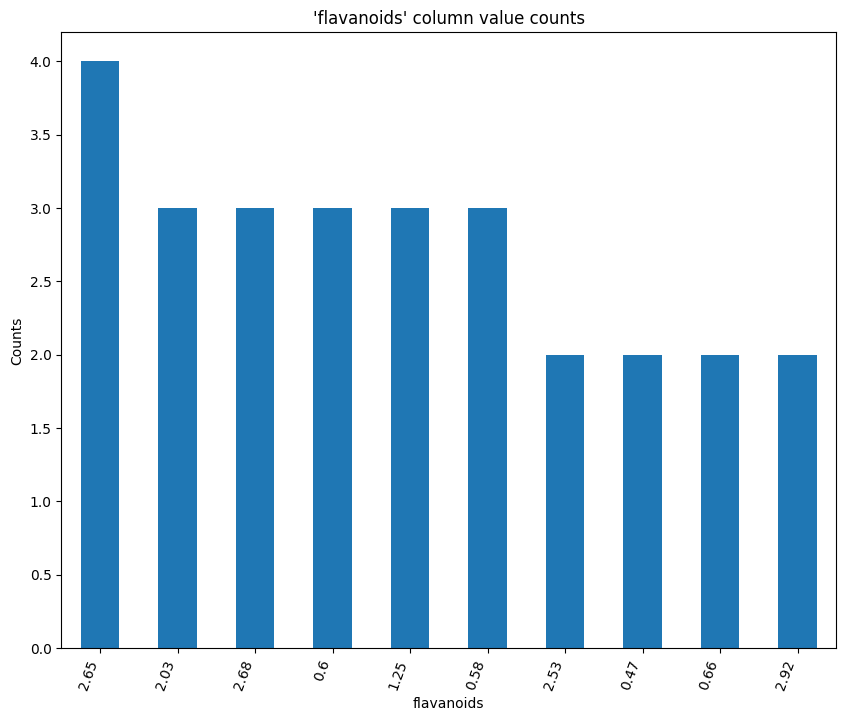

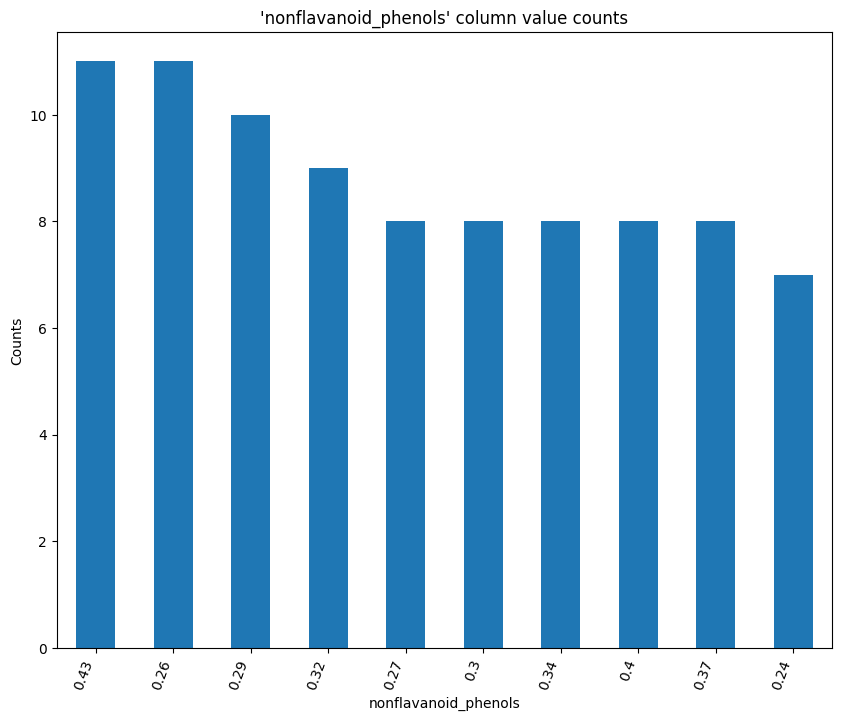

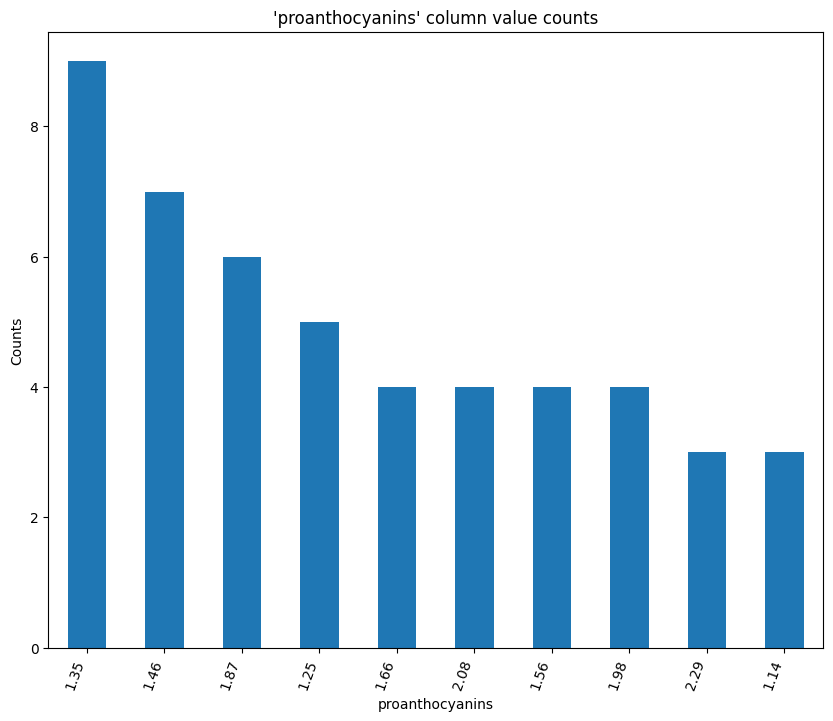

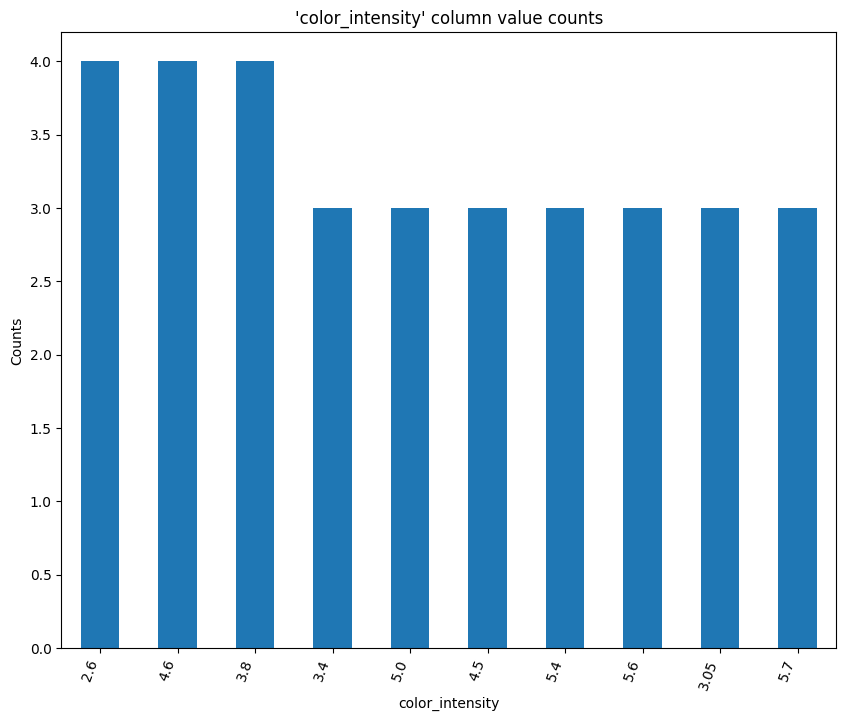

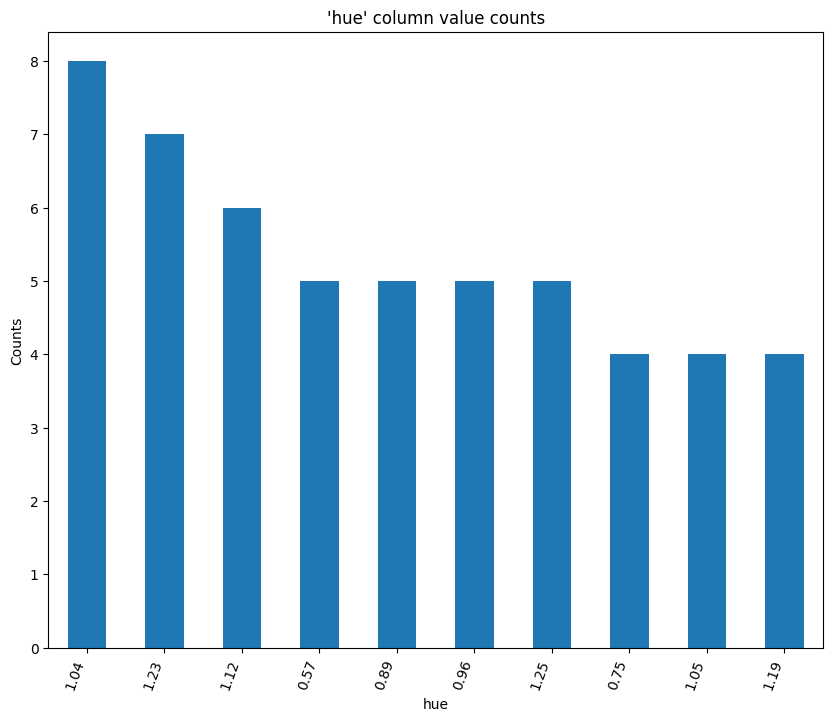

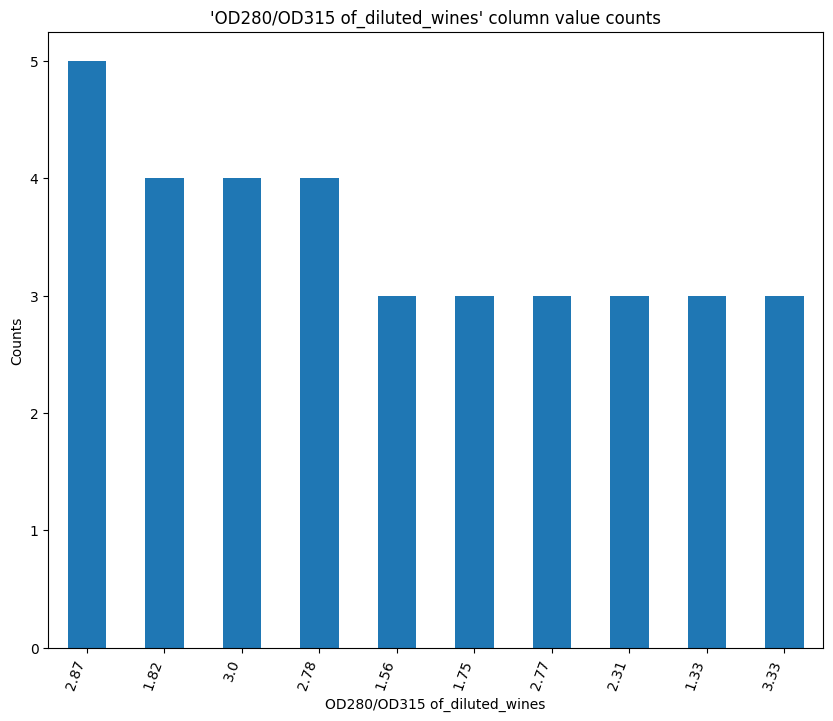

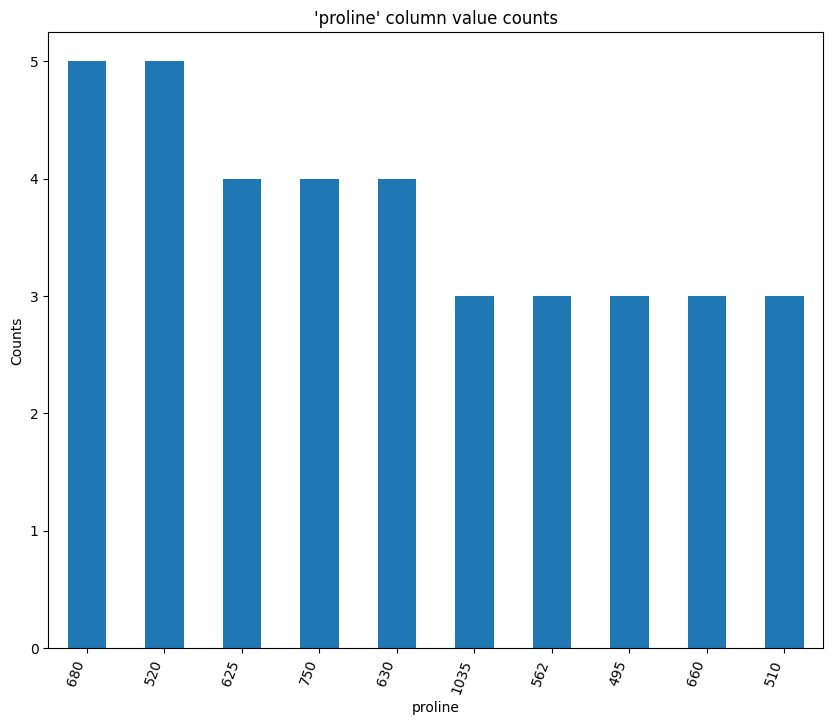

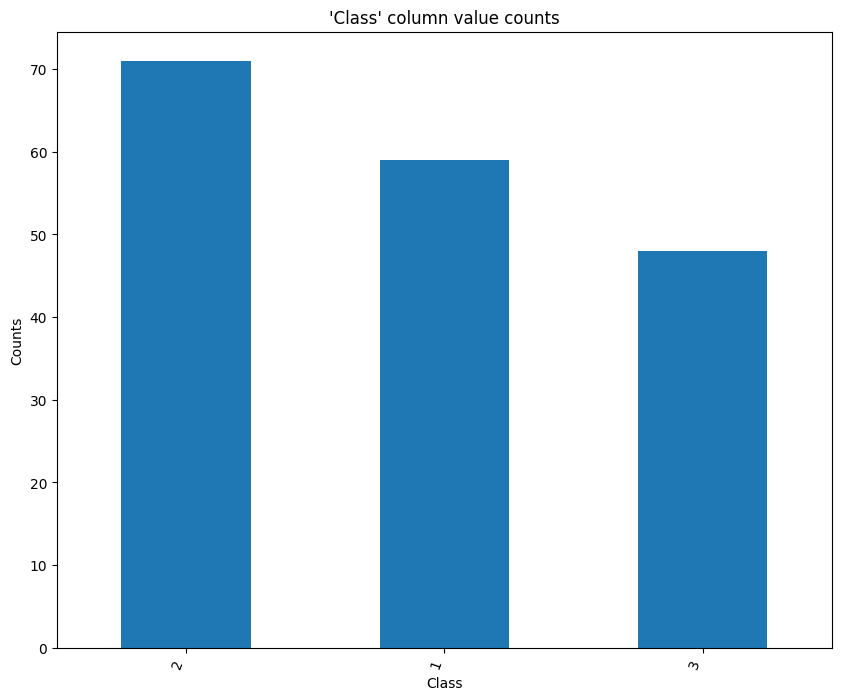

In [5]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

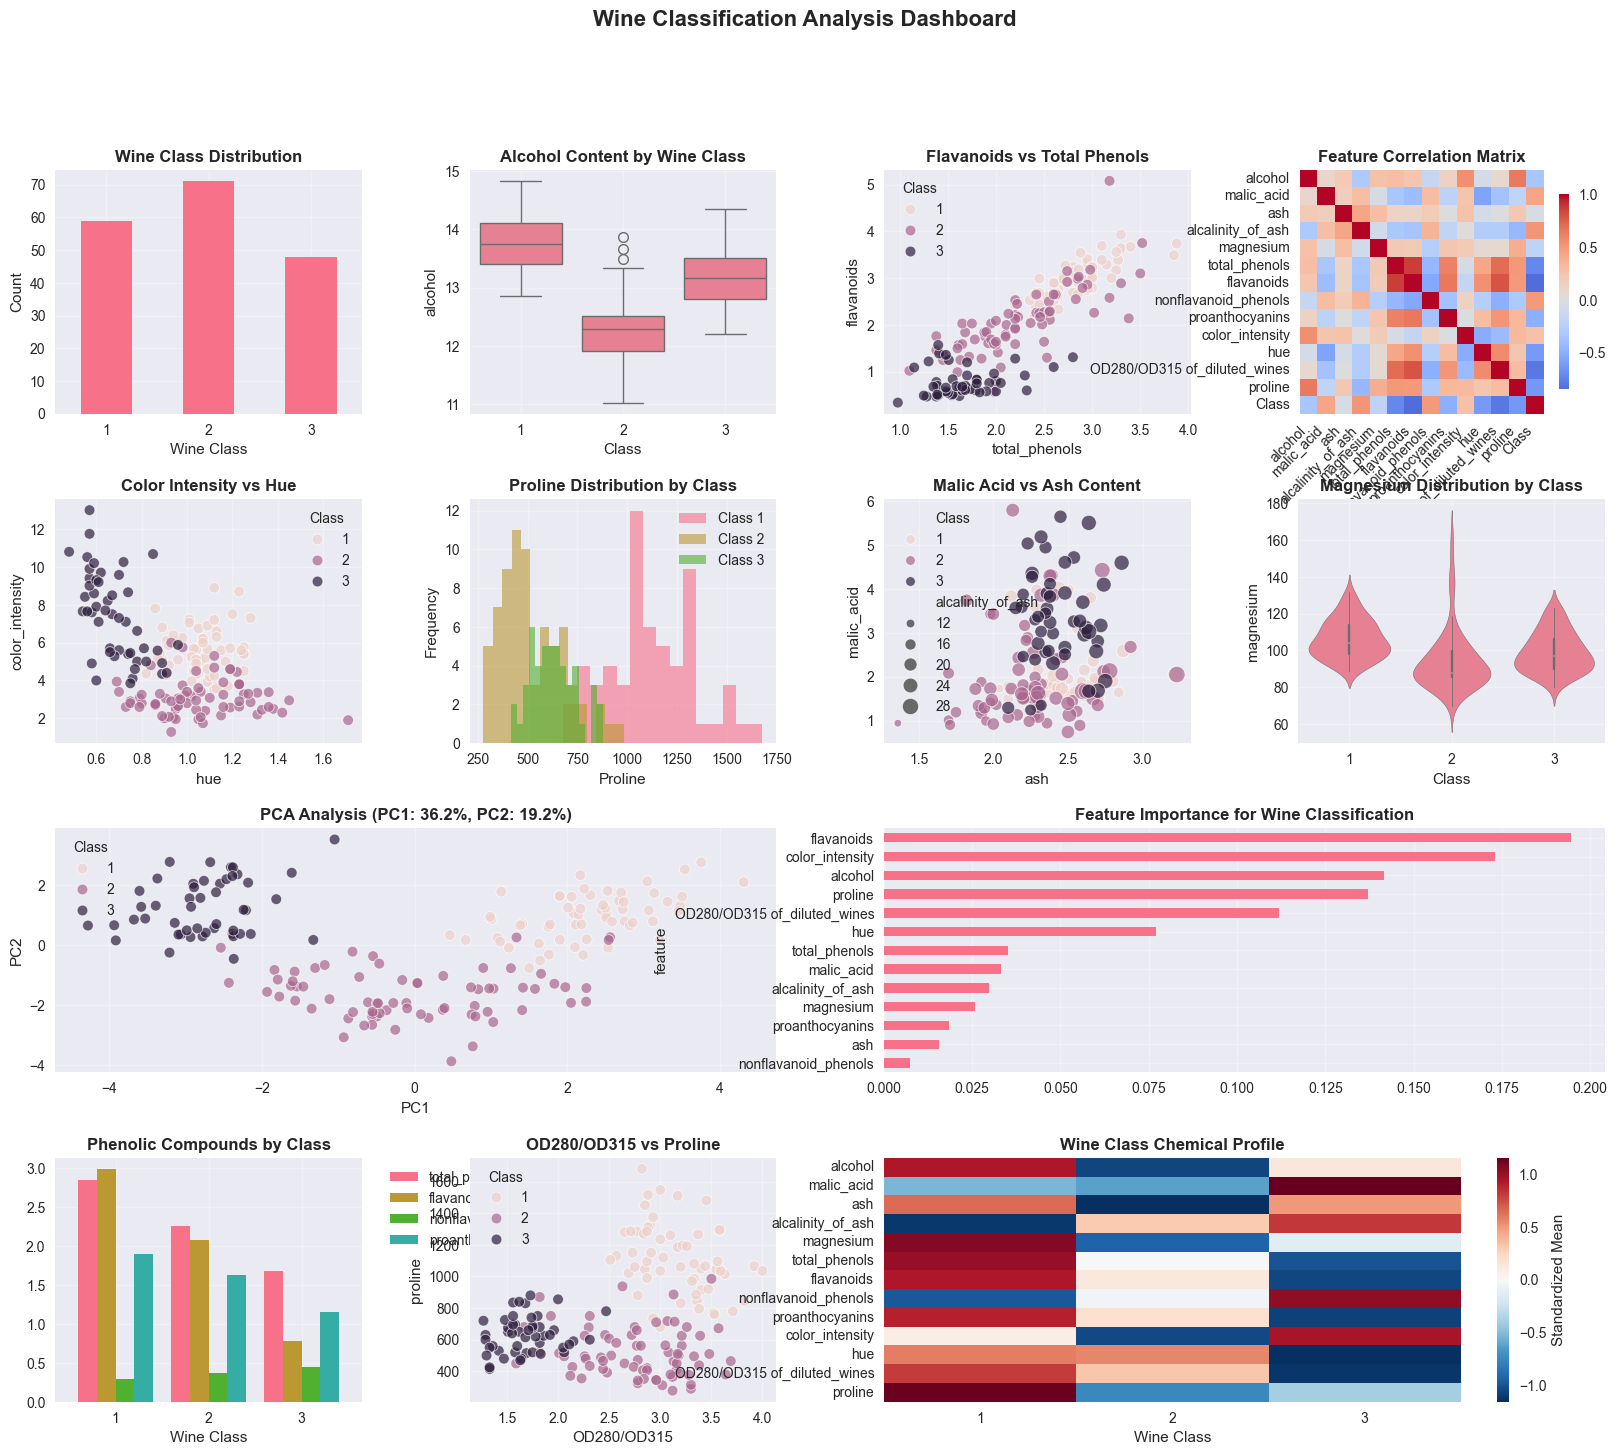

Wine Classification Dataset Summary:
Total samples: 178
Number of classes: 3
Class distribution:
  Class 1: 59 samples (33.1%)
  Class 2: 71 samples (39.9%)
  Class 3: 48 samples (27.0%)

Class Statistics:
       alcohol  flavanoids  color_intensity  proline
Class                                               
1        13.74        2.98             5.53  1115.71
2        12.28        2.08             3.09   519.51
3        13.15        0.78             7.40   629.90

Most Discriminative Features:
1. flavanoids: 0.194
2. color_intensity: 0.173
3. alcohol: 0.142
4. proline: 0.137
5. OD280/OD315 of_diluted_wines: 0.112


In [8]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create comprehensive visualization
def create_wine_classification_dashboard():
    """Create a comprehensive wine classification visualization dashboard"""
    
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(4, 4, hspace=0.35, wspace=0.35)
    
    # 1. Class Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    df['Class'].value_counts().sort_index().plot(kind='bar', ax=ax1, rot=0)
    ax1.set_title('Wine Class Distribution', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Wine Class')
    ax1.set_ylabel('Count')
    ax1.grid(True, alpha=0.3)
    
    # 2. Alcohol Content by Class
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(data=df, x='Class', y='alcohol', ax=ax2)
    ax2.set_title('Alcohol Content by Wine Class', fontweight='bold', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # 3. Flavanoids vs Total Phenols
    ax3 = fig.add_subplot(gs[0, 2])
    sns.scatterplot(data=df, x='total_phenols', y='flavanoids', hue='Class', 
                   s=60, alpha=0.7, ax=ax3)
    ax3.set_title('Flavanoids vs Total Phenols', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3)
    
    # 4. Correlation Heatmap
    ax4 = fig.add_subplot(gs[0, 3])
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=ax4, 
                cbar_kws={'shrink': 0.8}, square=True)
    ax4.set_title('Feature Correlation Matrix', fontweight='bold', fontsize=12)
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax4.get_yticklabels(), rotation=0)
    
    # 5. Color Intensity vs Hue
    ax5 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(data=df, x='hue', y='color_intensity', hue='Class', 
                   s=60, alpha=0.7, ax=ax5)
    ax5.set_title('Color Intensity vs Hue', fontweight='bold', fontsize=12)
    ax5.grid(True, alpha=0.3)
    
    # 6. Proline Content Analysis
    ax6 = fig.add_subplot(gs[1, 1])
    for wine_class in sorted(df['Class'].unique()):
        subset = df[df['Class'] == wine_class]
        ax6.hist(subset['proline'], alpha=0.6, label=f'Class {int(wine_class)}', bins=15)
    ax6.set_title('Proline Distribution by Class', fontweight='bold', fontsize=12)
    ax6.set_xlabel('Proline')
    ax6.set_ylabel('Frequency')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # 7. Malic Acid vs Ash
    ax7 = fig.add_subplot(gs[1, 2])
    sns.scatterplot(data=df, x='ash', y='malic_acid', hue='Class', 
                   size='alcalinity_of_ash', sizes=(30, 150), alpha=0.7, ax=ax7)
    ax7.set_title('Malic Acid vs Ash Content', fontweight='bold', fontsize=12)
    ax7.grid(True, alpha=0.3)
    
    # 8. Magnesium Content by Class
    ax8 = fig.add_subplot(gs[1, 3])
    sns.violinplot(data=df, x='Class', y='magnesium', ax=ax8)
    ax8.set_title('Magnesium Distribution by Class', fontweight='bold', fontsize=12)
    ax8.grid(True, alpha=0.3)
    
    # 9. PCA Analysis
    ax9 = fig.add_subplot(gs[2, :2])
    features_for_pca = df.drop('Class', axis=1)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_for_pca)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_scaled)
    
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Class'] = df['Class']
    
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', s=60, alpha=0.7, ax=ax9)
    ax9.set_title(f'PCA Analysis (PC1: {pca.explained_variance_ratio_[0]:.1%}, PC2: {pca.explained_variance_ratio_[1]:.1%})', 
                 fontweight='bold', fontsize=12)
    ax9.grid(True, alpha=0.3)
    
    # 10. Feature Importance
    ax10 = fig.add_subplot(gs[2, 2:])
    X = df.drop('Class', axis=1)
    y = df['Class']
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=True)
    
    importance_df.plot(x='feature', y='importance', kind='barh', ax=ax10, legend=False)
    ax10.set_title('Feature Importance for Wine Classification', fontweight='bold', fontsize=12)
    ax10.grid(True, alpha=0.3)
    
    # 11. Phenolic Compounds Analysis
    ax11 = fig.add_subplot(gs[3, 0])
    phenolic_cols = ['total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins']
    phenolic_means = df.groupby('Class')[phenolic_cols].mean()
    phenolic_means.plot(kind='bar', ax=ax11, rot=0, width=0.8)
    ax11.set_title('Phenolic Compounds by Class', fontweight='bold', fontsize=12)
    ax11.set_xlabel('Wine Class')
    ax11.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax11.grid(True, alpha=0.3)
    
    # 12. OD280/OD315 vs Proline
    ax12 = fig.add_subplot(gs[3, 1])
    sns.scatterplot(data=df, x='OD280/OD315 of_diluted_wines', y='proline', 
                   hue='Class', s=60, alpha=0.7, ax=ax12)
    ax12.set_title('OD280/OD315 vs Proline', fontweight='bold', fontsize=12)
    ax12.set_xlabel('OD280/OD315')
    ax12.grid(True, alpha=0.3)
    
    # 13. Class Profile Heatmap
    ax13 = fig.add_subplot(gs[3, 2:])
    class_means = df.groupby('Class').mean()
    # Normalize for better visualization
    class_means_norm = (class_means - class_means.mean()) / class_means.std()
    
    sns.heatmap(class_means_norm.T, annot=False, cmap='RdBu_r', center=0, ax=ax13,
                cbar_kws={'label': 'Standardized Mean'})
    ax13.set_title('Wine Class Chemical Profile', fontweight='bold', fontsize=12)
    ax13.set_xlabel('Wine Class')
    plt.setp(ax13.get_yticklabels(), rotation=0)
    
    plt.suptitle('Wine Classification Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    return fig

# Generate and display the dashboard
dashboard_fig = create_wine_classification_dashboard()
plt.show()

# Print summary statistics
print("Wine Classification Dataset Summary:")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"Number of classes: {df['Class'].nunique()}")
print(f"Class distribution:")
for class_num in sorted(df['Class'].unique()):
    count = len(df[df['Class'] == class_num])
    percentage = count / len(df) * 100
    print(f"  Class {int(class_num)}: {count} samples ({percentage:.1f}%)")

print("\nClass Statistics:")
print(df.groupby('Class')[['alcohol', 'flavanoids', 'color_intensity', 'proline']].mean().round(2))

print("\nMost Discriminative Features:")
X = df.drop('Class', axis=1)
y = df['Class']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(importance_df.head(5).iterrows()):
    print(f"{i+1}. {row['feature']}: {row['importance']:.3f}")

## LogisticRegression

Dataset shape: (178, 13)
Feature names: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315 of_diluted_wines', 'proline'], dtype='object')
Number of classes: 3
Class distribution: [ 0 59 71 48]

X Train shape: (142, 13)
Y Train shape: (142,)
X Test shape: (36, 13)
Y Test shape: (36,)
-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance ---
Accuracy test set: 1.0000
Accuracy train set: 0.9930
-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance Using Pipeline---
Accuracy test set: 1.0000
Accuracy train set: 1.0000
-------------------------------------------------------------------------------------------------------------------------------


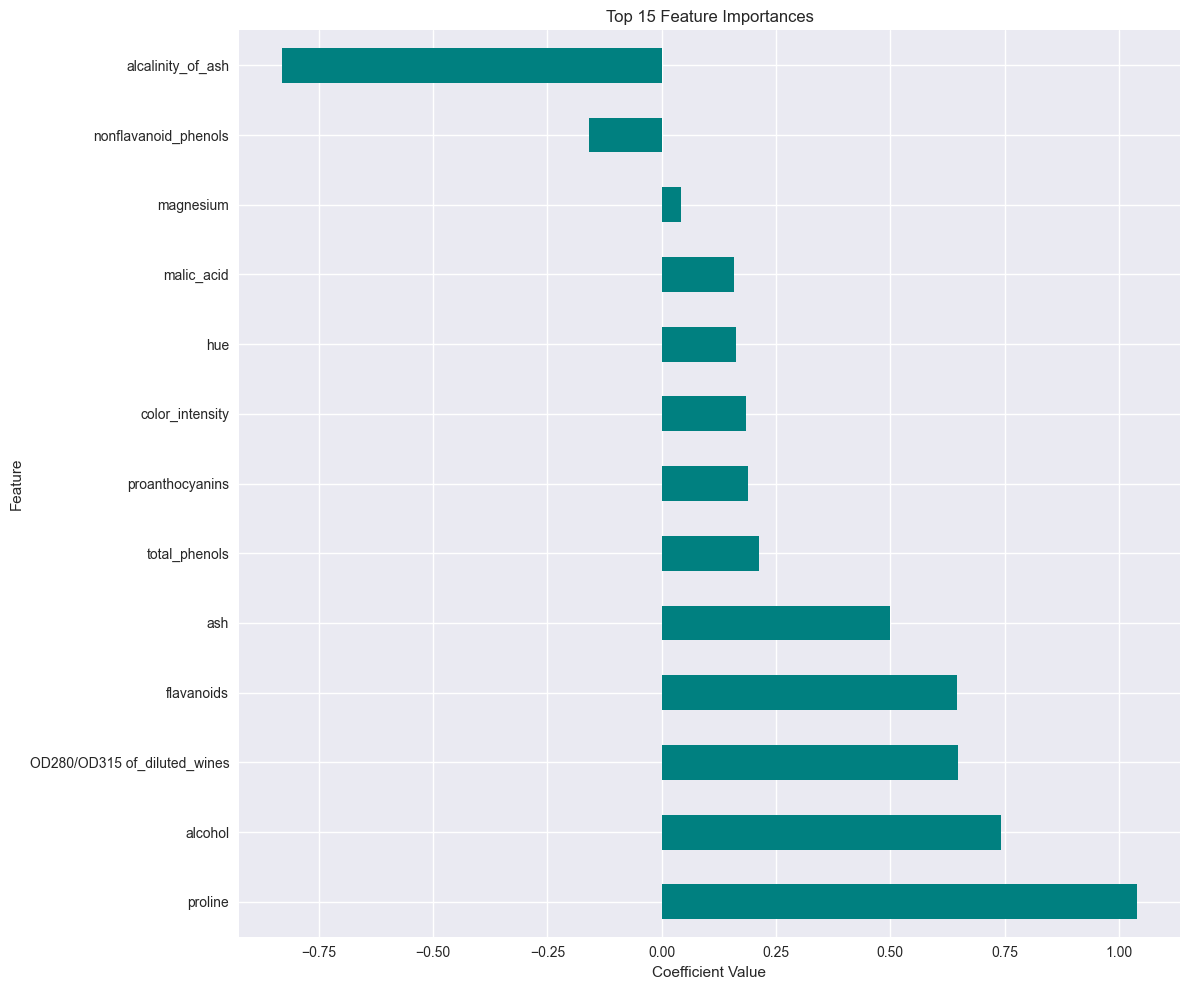

--- Top 10 Most Important Features ---
                              Coefficient
proline                          1.040131
alcohol                          0.741644
OD280/OD315 of_diluted_wines     0.647046
flavanoids                       0.646226
ash                              0.498550
total_phenols                    0.211912
proanthocyanins                  0.188203
color_intensity                  0.184843
hue                              0.163240
malic_acid                       0.156998
--- Bottom 10 Least Important Features ---
                      Coefficient
flavanoids               0.646226
ash                      0.498550
total_phenols            0.211912
proanthocyanins          0.188203
color_intensity          0.184843
hue                      0.163240
malic_acid               0.156998
magnesium                0.041779
nonflavanoid_phenols    -0.158039
alcalinity_of_ash       -0.831367
----------------------------------------------------------------------------------

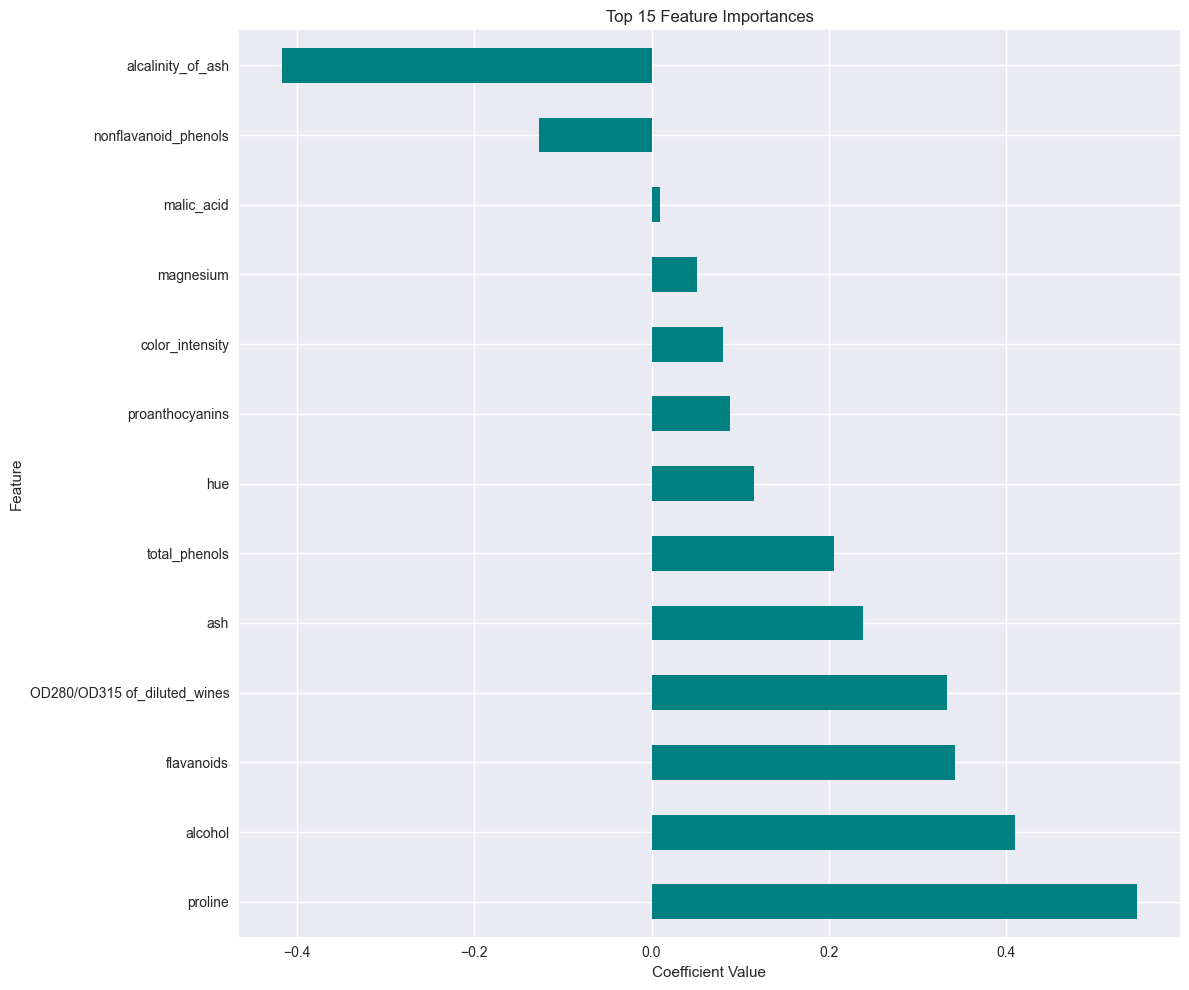

--- Top 10 Most Important Features ---
                              Coefficient
proline                          0.547860
alcohol                          0.410296
flavanoids                       0.342071
OD280/OD315 of_diluted_wines     0.333675
ash                              0.238063
total_phenols                    0.205274
hue                              0.115329
proanthocyanins                  0.088073
color_intensity                  0.080183
magnesium                        0.050870
--- Bottom 10 Least Important Features ---
                              Coefficient
OD280/OD315 of_diluted_wines     0.333675
ash                              0.238063
total_phenols                    0.205274
hue                              0.115329
proanthocyanins                  0.088073
color_intensity                  0.080183
magnesium                        0.050870
malic_acid                       0.009281
nonflavanoid_phenols            -0.126731
alcalinity_of_ash               -0.4

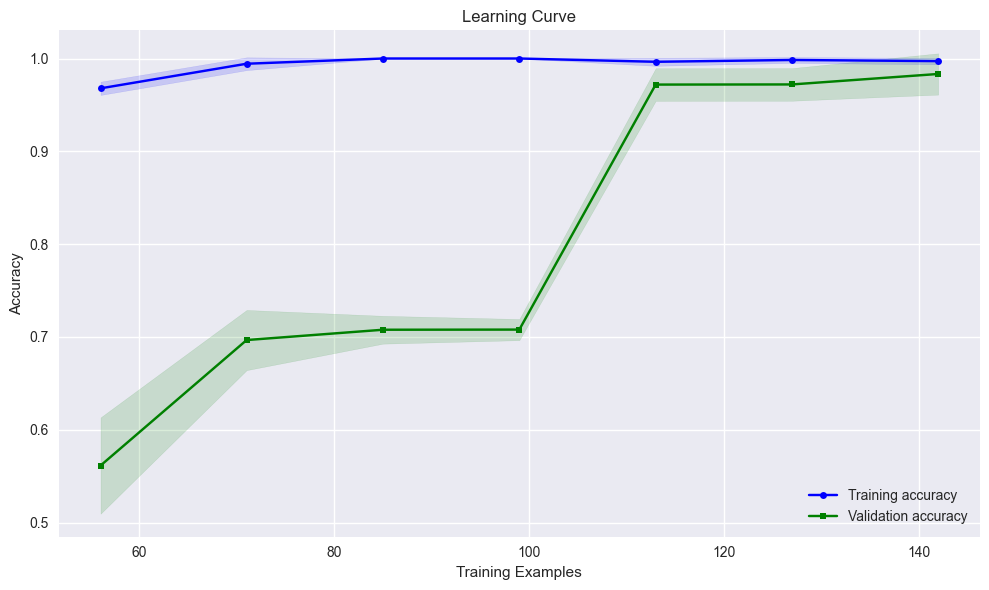

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,prediction
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,prediction
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,prediction
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2


In [9]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = y.values

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print('-' *127)  

# Feature importance
basic_model = lr.coef_
if hasattr(basic_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        basic_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances Of Basic Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *127)  
    
# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
y_pred_pipe_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipe):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_pipe_train):.4f}") 
print('-' *127)   

# Feature importance
pipeline_model = pipeline.named_steps['classifier']
if hasattr(pipeline_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        pipeline_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *127)  
    
# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [10000, 100000, 1000000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print('-' *127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}")
print('-' *127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Grid Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Pipeline Model Accuracy: {accuracy_score(y_test, y_pred_pipe):.4f}")
print('-' *127) 

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Tuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}") 
print('-' *127)   

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print('-' *127)   
    
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred_lr, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_tuned, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipe, 3)
display(pipe_model_df.head())

## AdaBoostClassifier

Dataset shape: (178, 13)
Feature names: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315 of_diluted_wines', 'proline'], dtype='object')
Number of classes: 3
Class distribution: [ 0 59 71 48]

X Train shape: (142, 13)
Y Train shape: (142,)
X Test shape: (36, 13)
Y Test shape: (36,)
-------------------------------------------------------------------------------------------------------------------------------
--- Basic AdaBoost Model ---
Accuracy test set: 0.9444
Accuracy train set: 1.0000

--- Grid Search for Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50}
Best cross-validation score: 0.9433

Test accuracy with best model test set: 0.9444
Test accuracy with best model train set: 1.0000

--- Feature Importances ---


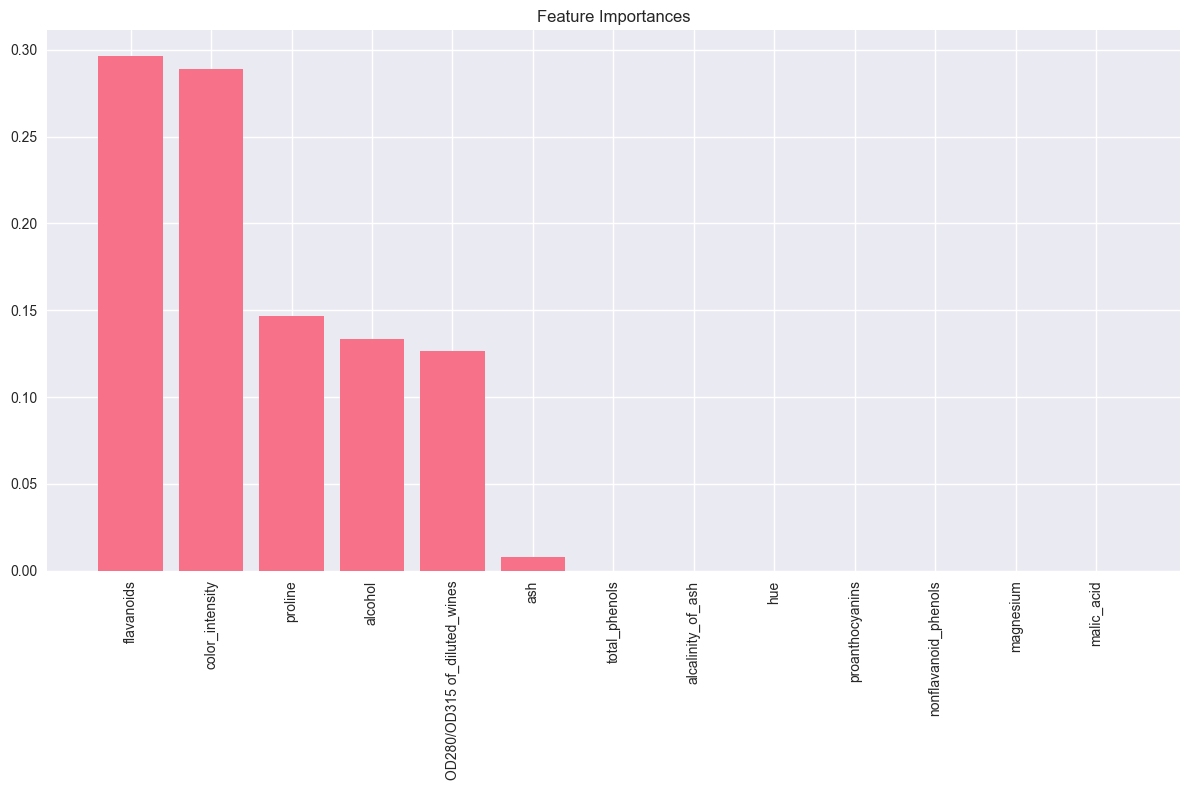


--- Learning Curve ---


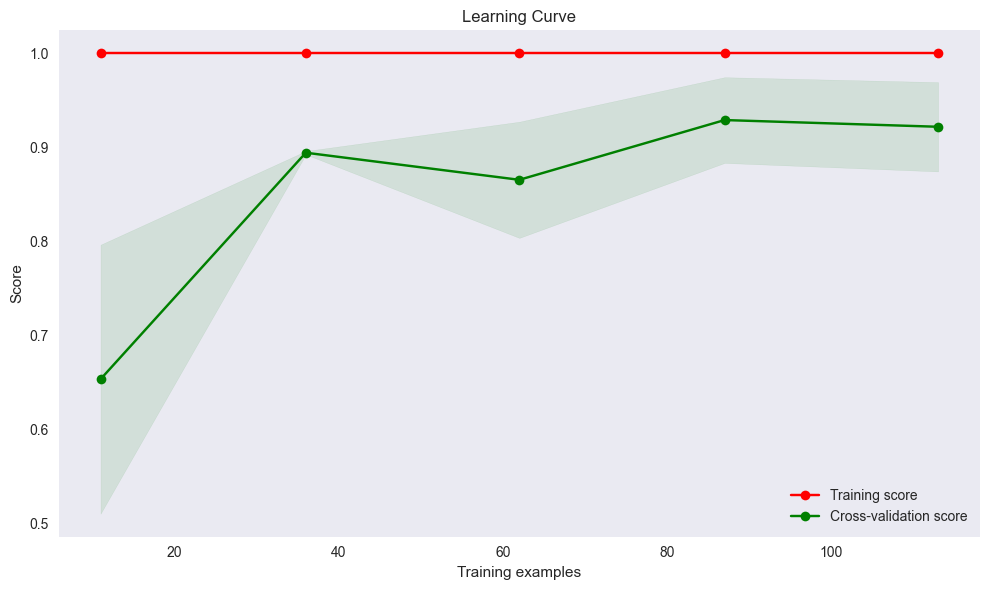


--- Effect of Learning Rate ---


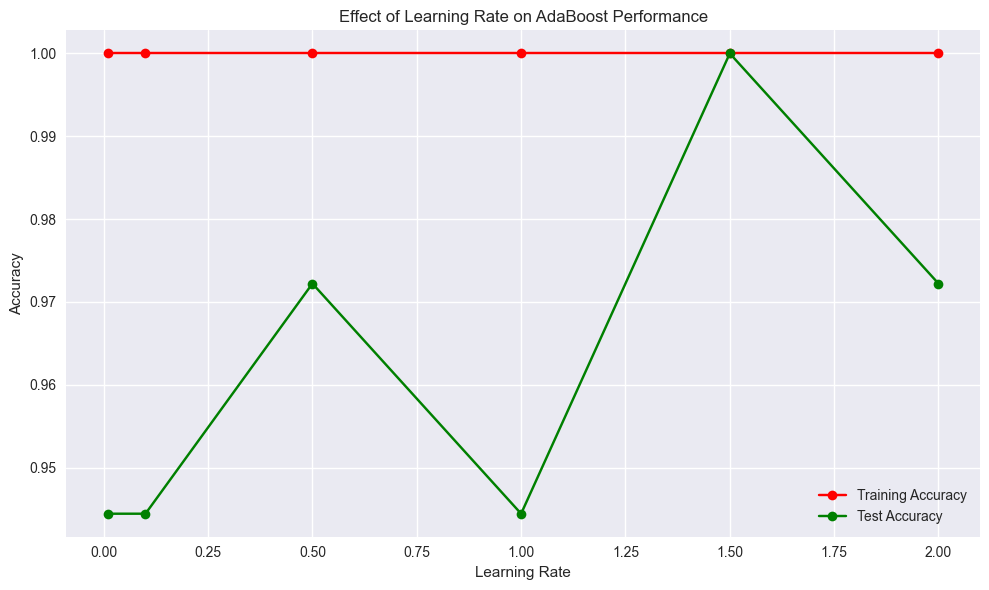


--- Effect of Number of Estimators ---


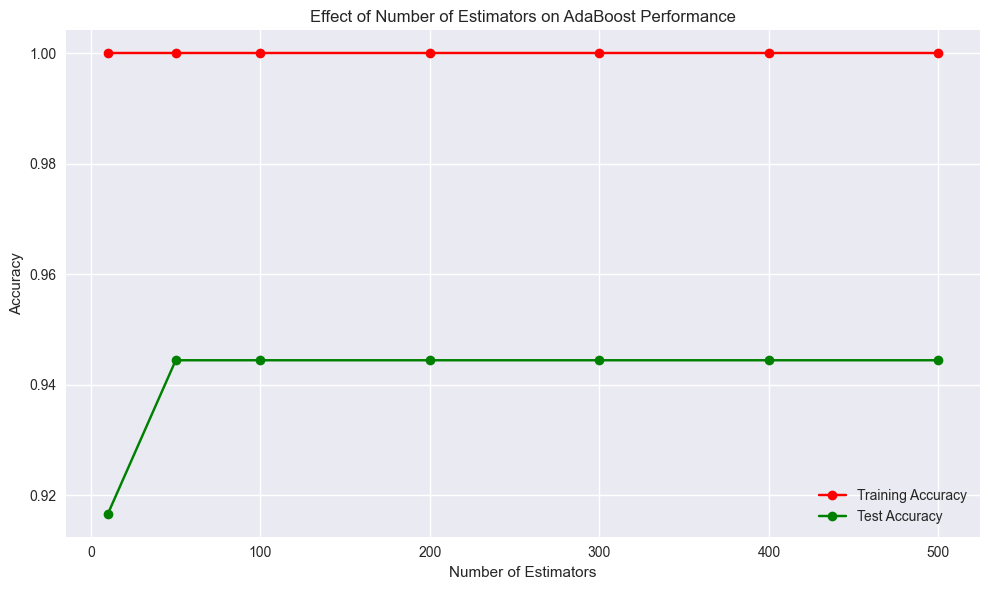


--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 100, 'adaboost__learning_rate': 0.1, 'adaboost__estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}
Best cross-validation score: 0.9433

Pipeline test accuracy:  0.9444
Pipeline train accuracy: 1.0000

--- Model Comparison ---
Base AdaBoost accuracy: 0.9444
Grid Search tuned accuracy: 0.9444
Pipeline tuned accuracy: 0.9444


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,prediction
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,prediction
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315 of_diluted_wines,proline,prediction
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2


In [11]:
# For Various Classes
# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic AdaBoost model with default parameters
print("--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42)
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
y_pred_train = base_model.predict(X_train_scaled)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")

# Grid search for hyperparameter tuning
print("\n--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grid = best_model.predict(X_test_scaled)
y_pred_grid_train = best_model.predict(X_train_scaled)
print(f"Test accuracy with best model test set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Test accuracy with best model train set: {accuracy_score(y_train, y_pred_grid_train):.4f}")

# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("\n--- Feature Importances ---")
plot_feature_importance(best_model, X_train.columns)

# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("\n--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)

# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Learning Rate ---")
plot_learning_rate_effect()

# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

# Pipeline example with AdaBoost
print("\n--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}\n")

# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
y_pred_pipeline_train = best_pipeline.predict(X_train)
print(f"Pipeline test accuracy:  {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Pipeline train accuracy: {accuracy_score(y_train, y_pred_pipeline_train):.4f}")

# Compare with base model
print("\n--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")

# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = np.round(y_pred, 3)
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = np.round(y_pred_grid, 3)
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = np.round(y_pred_pipeline, 3)
display(pipe_model_df.head())

## RandomForestClassifier

Dataset shape: (178, 13)
Feature names: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315 of_diluted_wines', 'proline'], dtype='object')
Number of classes: 3
Class distribution: [ 0 59 71 48]

X Train shape: (142, 13)
Y Train shape: (142,)
X Test shape: (36, 13)
Y Test shape: (36,)
-------------------------------------------------------------------------------------------------------------------------------
Features: 13
Classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
---------------------------------------------------------------------

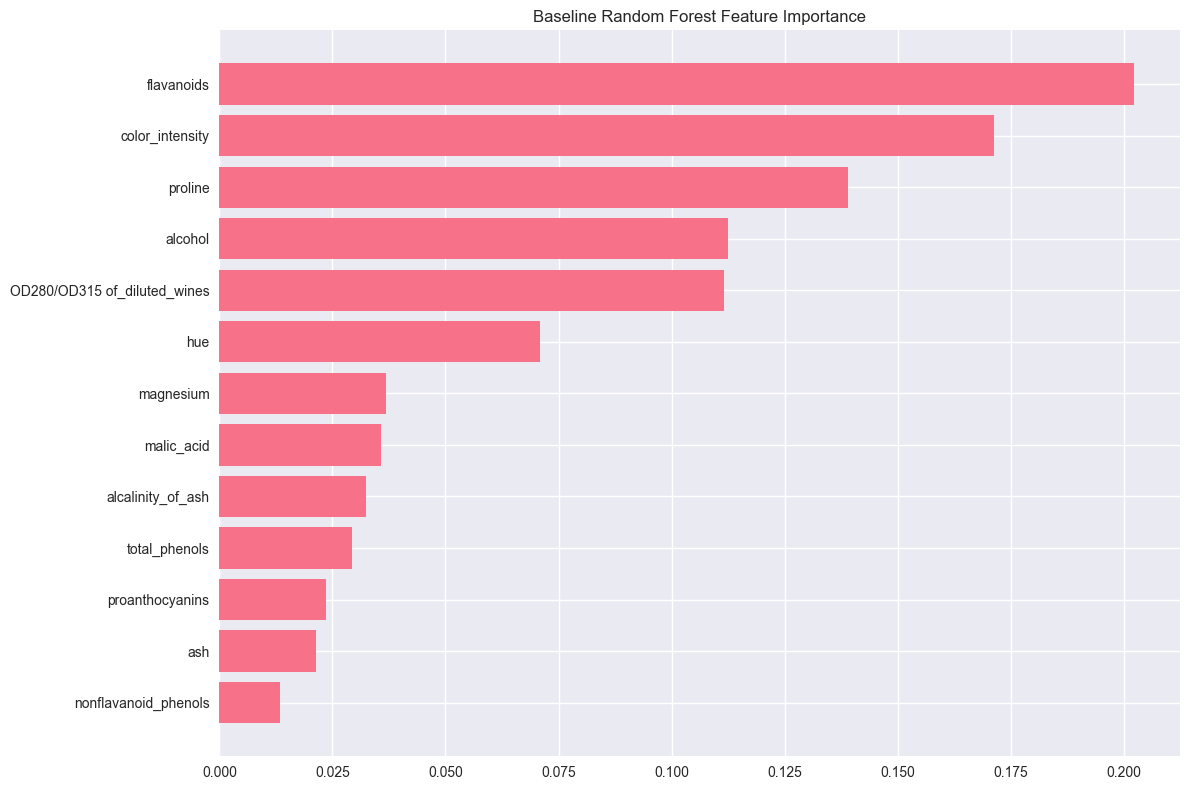

Cross-validation scores: [1.         1.         0.92857143 0.96428571 1.        ]
Mean CV accuracy: 0.9786
Standard deviation: 0.0286
----------------------------------------------------------------------------------------------------
--- Grid Search Hyperparameter Tuning ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9786


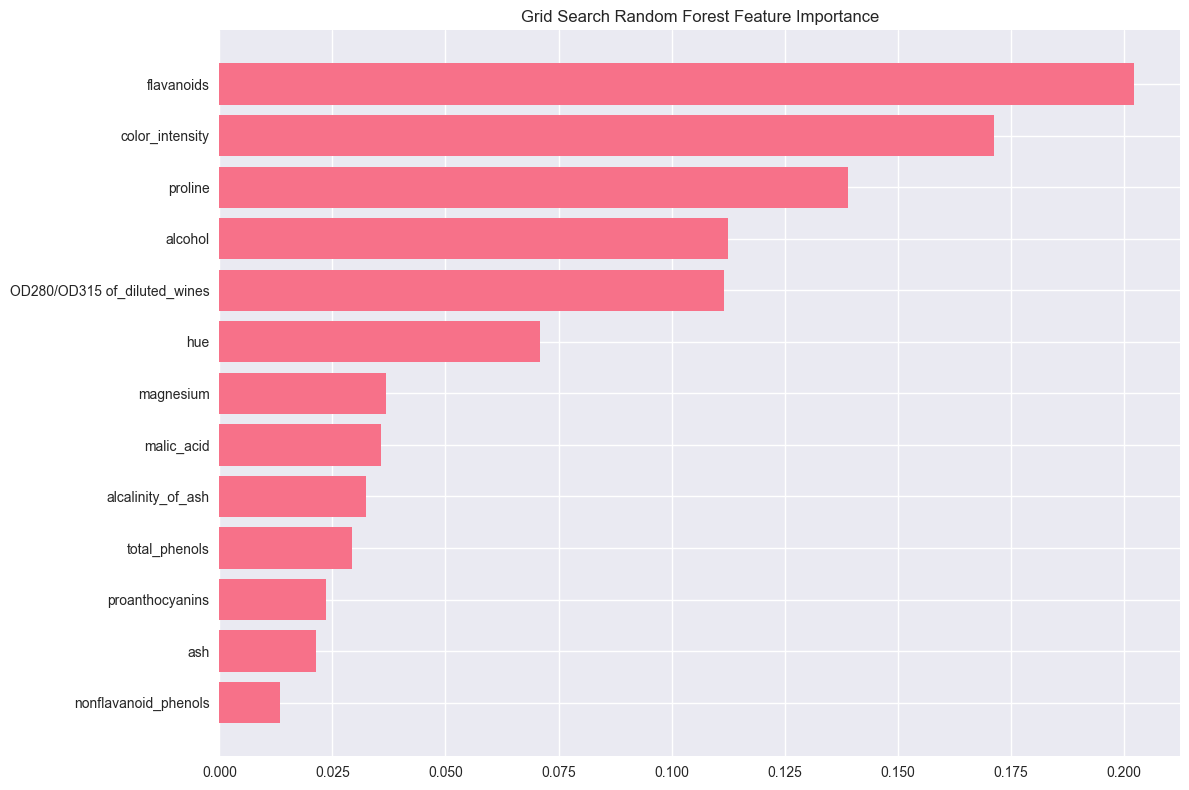

Cross-validation scores: [1.         1.         0.92857143 0.96428571 1.        ]
Mean CV accuracy: 0.9786
Standard deviation: 0.0286
----------------------------------------------------------------------------------------------------
--- Randomized Search Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best cross-validation score: 0.9786


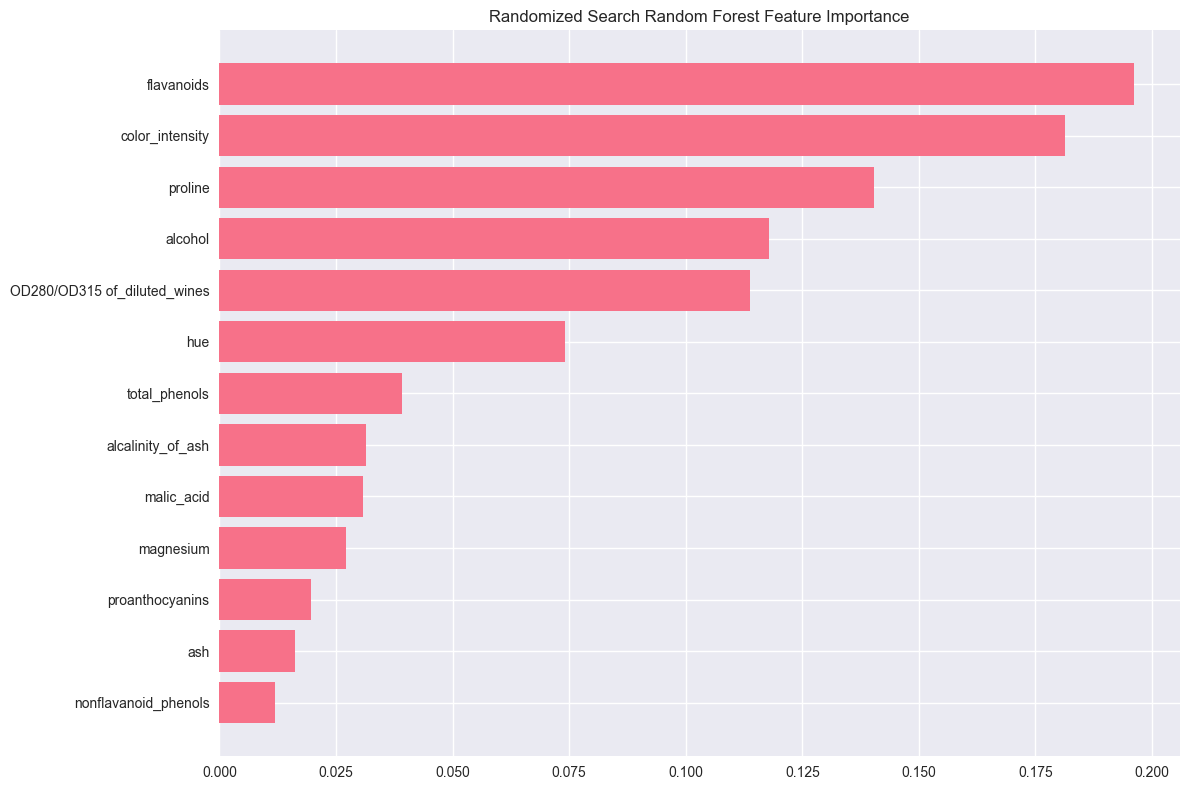

Cross-validation scores: [1.         1.         0.92857143 0.96428571 1.        ]
Mean CV accuracy: 0.9786
Standard deviation: 0.0286
----------------------------------------------------------------------------------------------------
--- Best Grid Search Model Evaluation ---
Accuracy Test Set: 1.0000
Accuracy Train Set: 1.0000
----------------------------------------------------------------------------------------------------


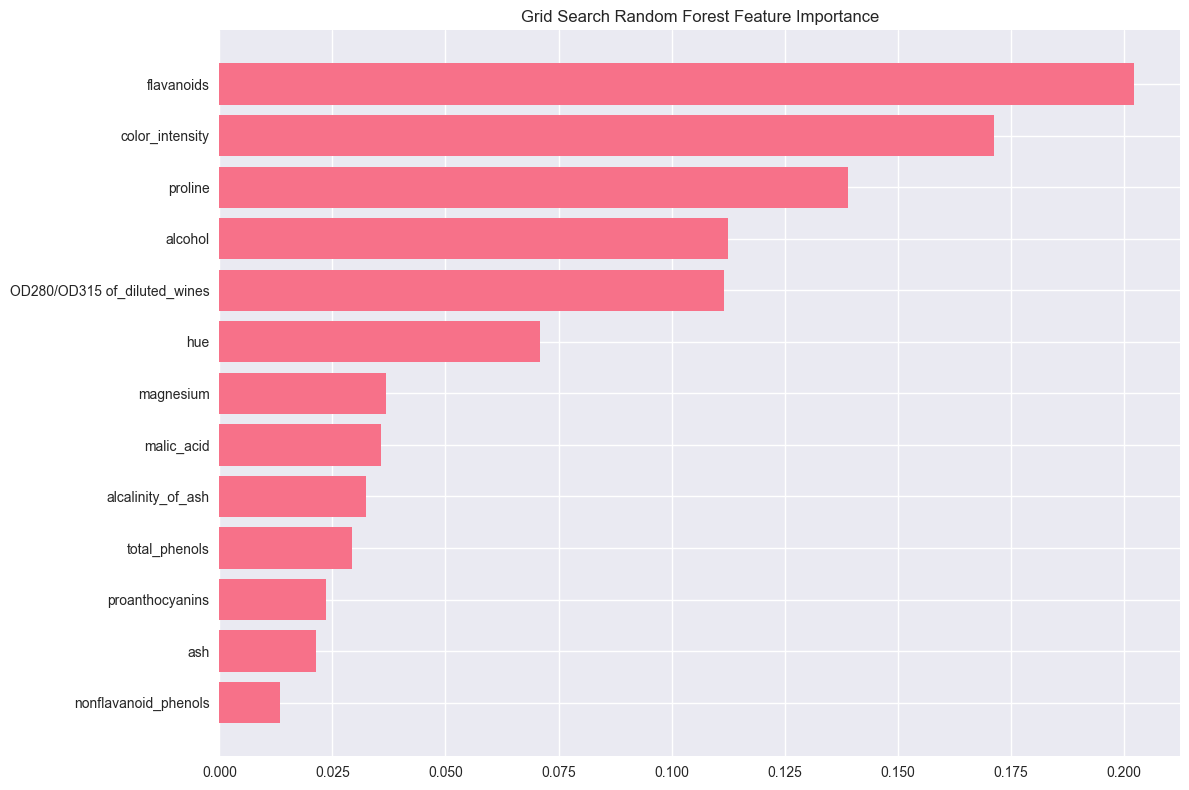

Cross-validation scores: [1.         1.         0.92857143 0.96428571 1.        ]
Mean CV accuracy: 0.9786
Standard deviation: 0.0286
----------------------------------------------------------------------------------------------------


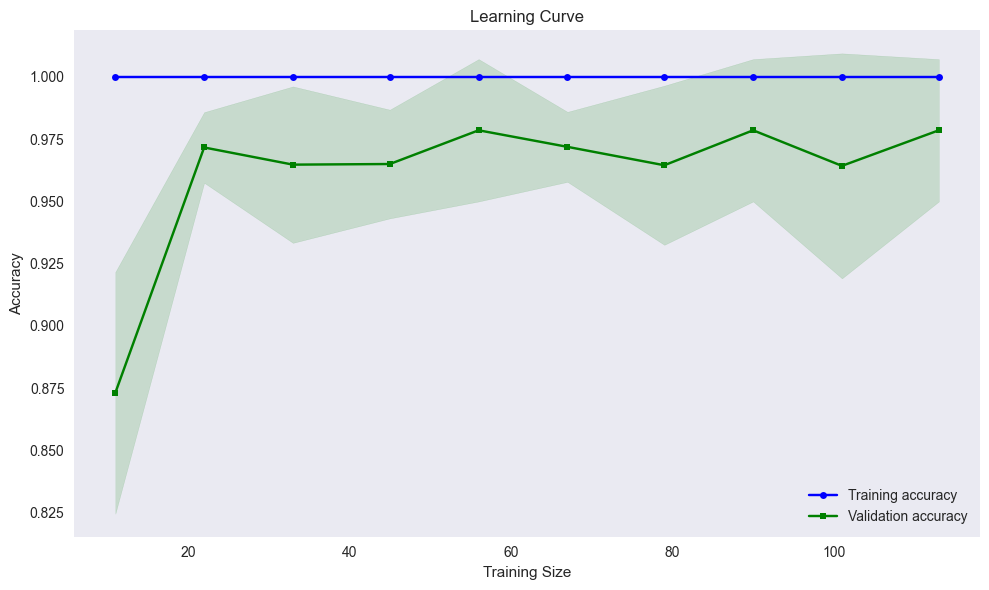

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 60
Fine-tuned accuracy: 0.9857
----------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 60}
Accuracy Test Set: 1.0000
Accuracy Train Set: 1.0000

--- Model Comparison ---
Base Random Forest accuracy: 1.0000
Grid Search tuned RF accuracy: 1.0000
Final tuned RF accuracy: 1.0000


In [13]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
# Prepare the data
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = y.values

print(f"Features: {len(feature_names)}")
print(f"Classes: {target_names}")
print('-' *127)

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_base_train):.4f}")

# Feature importance analysis
feature_importances = rf_base.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Baseline Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# Cross-validation of the best model
cv_scores = cross_val_score(rf_base, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100)  

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Feature importance analysis
feature_importances = grid_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Grid Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# Cross-validation of the best model
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100)  

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")

# Feature importance analysis
feature_importances = randomized_search.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Randomized Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show() 

# Cross-validation of the best model
cv_scores = cross_val_score(randomized_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100) 

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print('-' *100) 

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
#plt.title('Random Forest Feature Importance')
plt.title('Grid Search Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *100) 

# 7. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 8. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *100) 

# 9. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters RF: {final_params}")
print(f"Accuracy Test Set: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train Set: {accuracy_score(y_train, y_pred_final_train):.4f}")

# Compare with base model
print("\n--- Model Comparison ---")
print(f"Base Random Forest accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Grid Search tuned RF accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Final tuned RF accuracy: {accuracy_score(y_test, y_pred_final):.4f}")